In [1]:
pwd

u'/home/riddhisw/Documents/2017/Scripts_Git/v0/NOTES_v0 _1/tex/fig_main/scripts'

In [2]:
import sys
sys.path.append('../../../../../')
from plot_tools.fig_preamble import *

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [3]:
ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_v0_'
figdata = '../svg/fig_data/paper_v0_'
figname='AKF_vs_LSF'

#### Figure: LSF and AKF for Msmt Noise Filtering ####

In [4]:
## Data
test_case_list = [19, 19, 19, 19]
variation_list = [9, 1, 5, 8]
case_labels = ['(a) 0.1% Noise', '(b) 1% Noise', '(c) 10% Noise', '(d) 25% Noise']

In [5]:
import matplotlib.transforms as mtransforms
from plot_tools.plot_figstyle_sheet import color_pallete # these are the agreed colors for the paper

In [6]:
# This calculates the Bayes Risk ratio for AKF relative to LSF for all test_cases

dummy = []
for idx_count in xrange(len(test_case_list)):
    dummy.append(get_Kalman_LSF_difference('AKF',test_case_list[idx_count], variation_list[idx_count], 
                                           datapath, give_ratio=1))
    
ratio_matrix = np.array(dummy)

# We get a unit ratio when AKF and LSF are of equivalent performance
theta = 1.0

# Save data
np.savez(figdata+figname+'Ratio_Matrix',ratio_matrix=ratio_matrix)

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 9
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 1
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 8


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 9
(19, 9)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 1
(19, 1)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 5
(19, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 19 8
(19, 8)
800


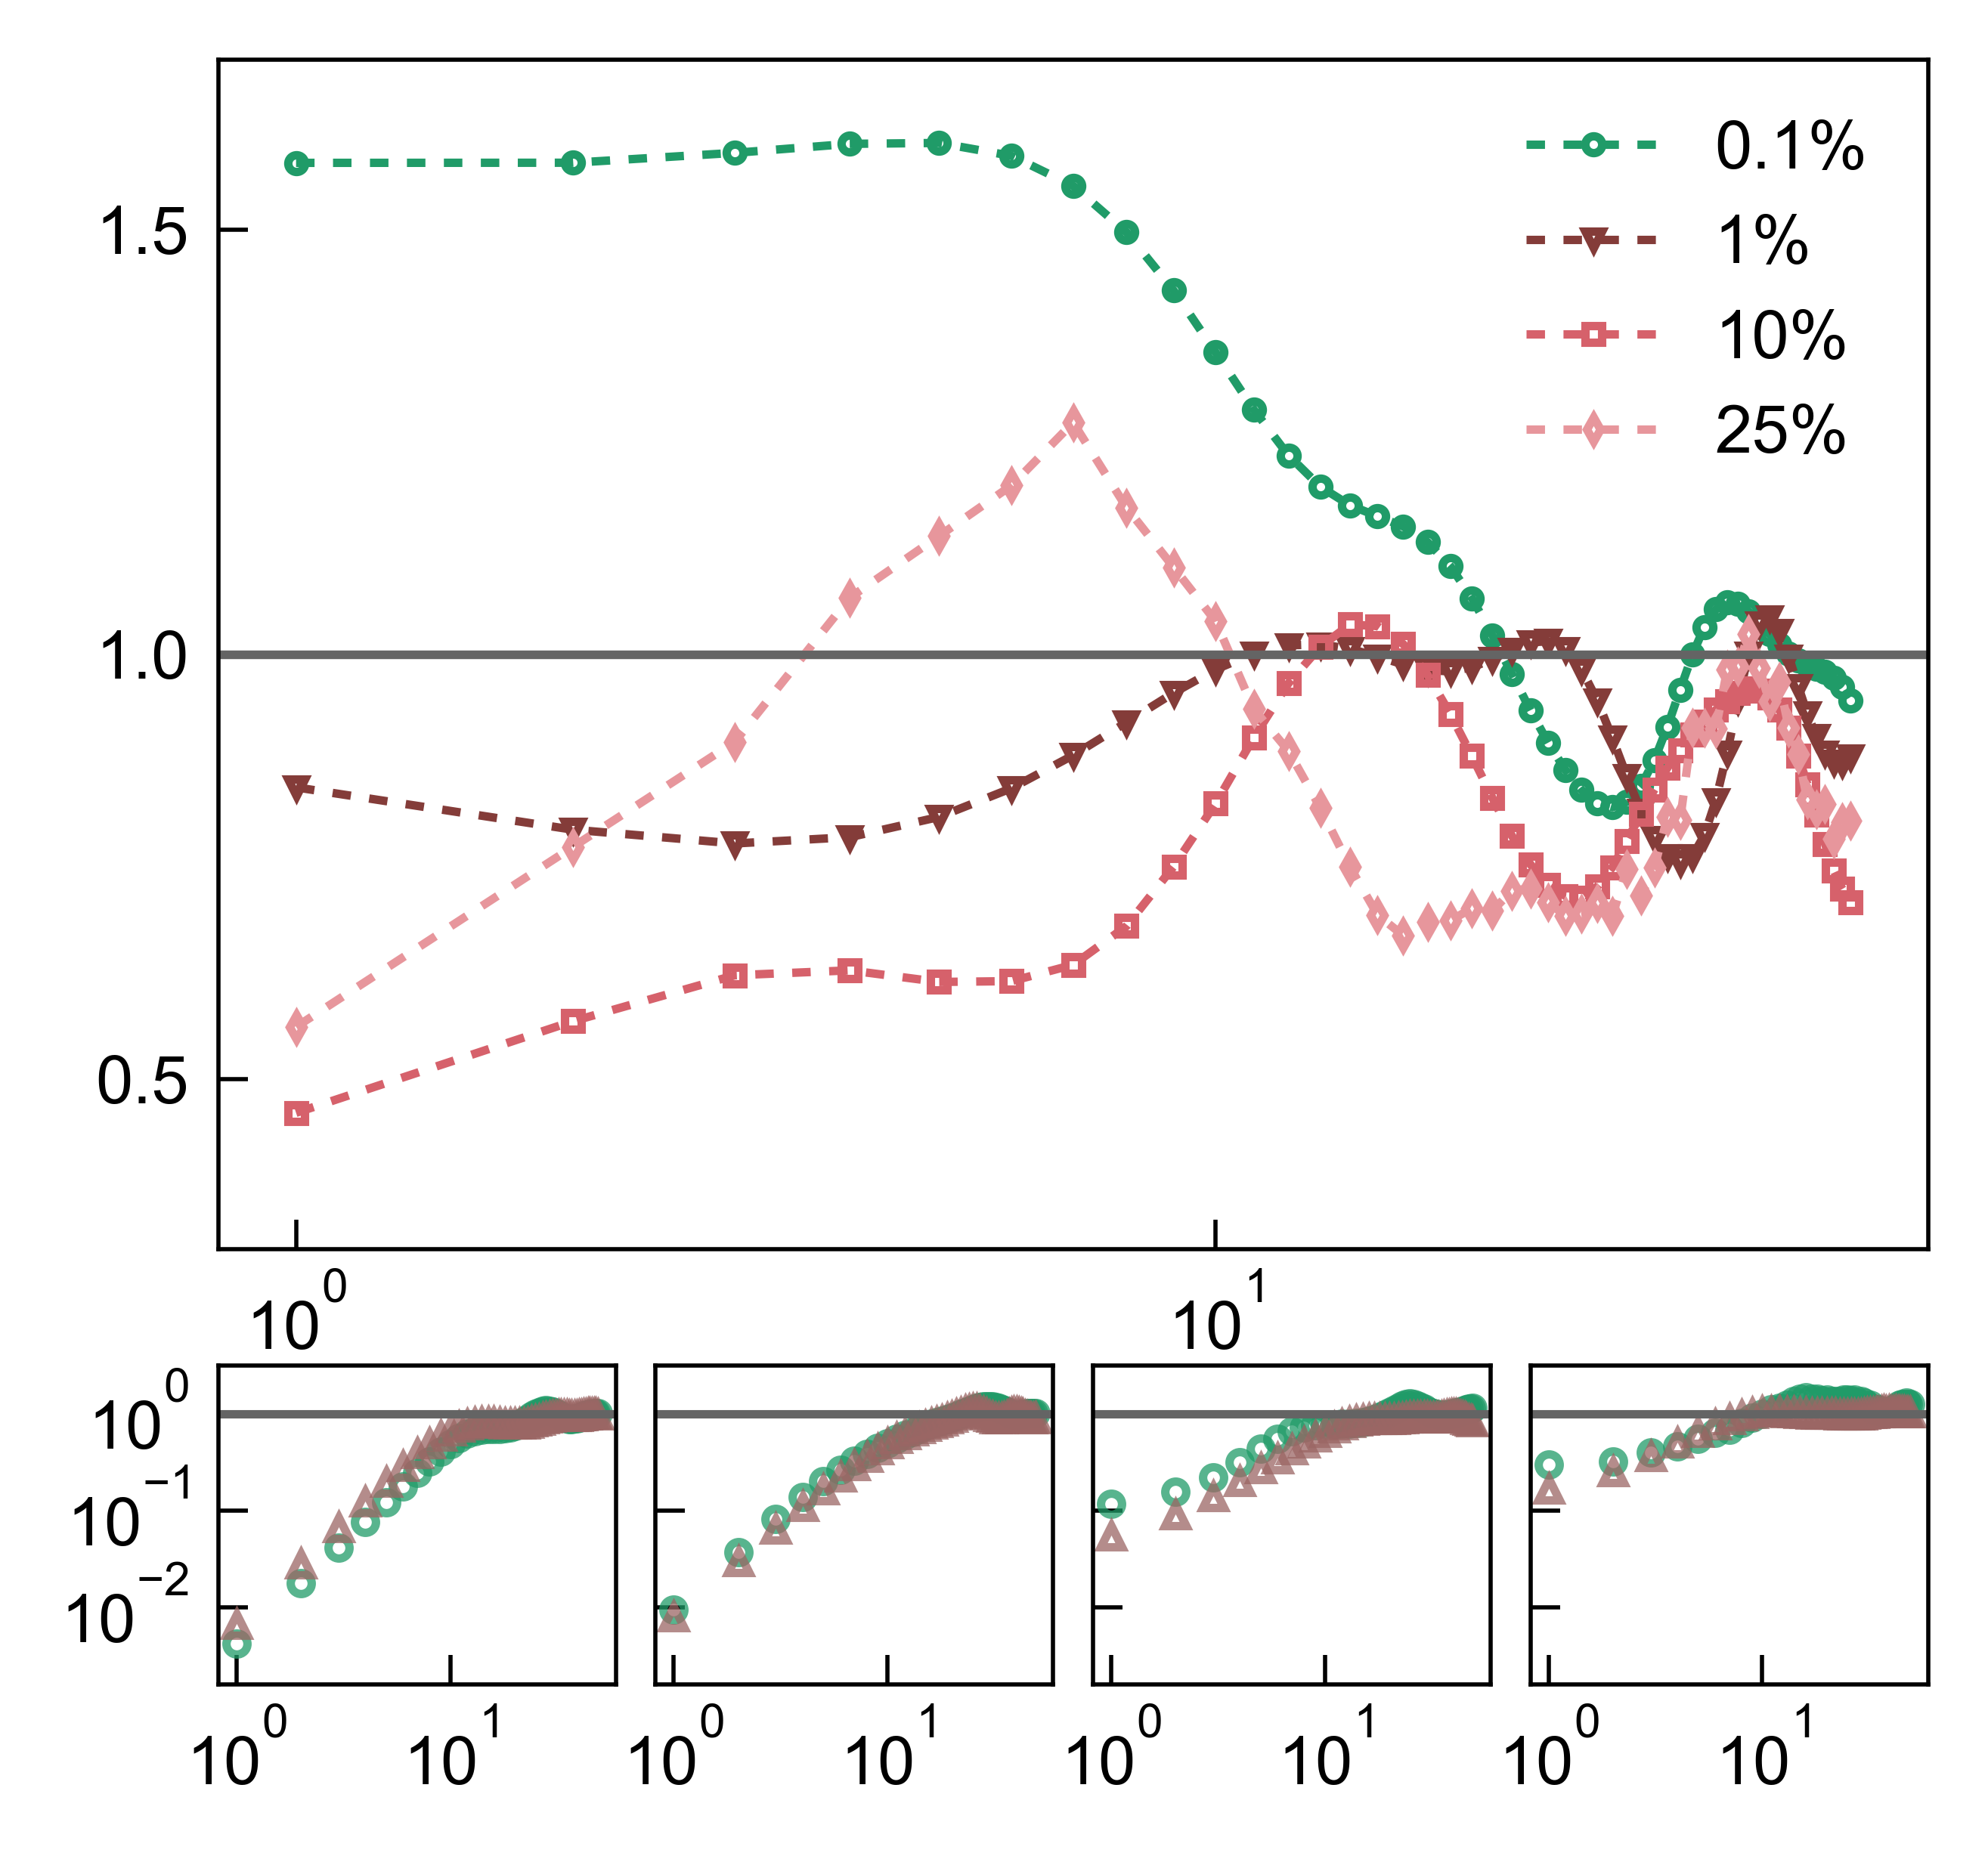

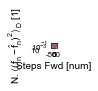

In [7]:
## Fig Type - A

case_labels_A = ['0.1%', '1% ', '10%', '25%']

nrows = 12
ncols = 4

# nrows = 4
# ncols = 2

# The top 2x2 subplots will be merged to present the ratio of LSF / AKF performance v. measurement noise strength
# The bottom 2x2 plots will be used to present the Bayes Risk trajectories for each testcase

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.15, right=0.985,
                       top=0.99, bottom=0.08, 
                       wspace=0.1, hspace=4.)

# gs = gridspec.GridSpec(nrows, ncols,
#                        left=0.15, right=0.985,
#                        top=0.99, bottom=0.05, 
#                        wspace=0.1, hspace=0.25)

fig2 = plt.figure(figsize=(cm2inch(8.6), cm2inch(7.5)), dpi=my_dpi)

# Figure placement

top =  fig2.add_subplot(gs[0:9, 0:4])
btm1 = fig2.add_subplot(gs[9:, 0])
btm2 = fig2.add_subplot(gs[9:, 1])
btm3 = fig2.add_subplot(gs[9:, 2])
btm4 = fig2.add_subplot(gs[9:, 3])

# top =  fig2.add_subplot(gs[0:2, 0:2])
# btm1 = fig2.add_subplot(gs[2, 0])
# btm2 = fig2.add_subplot(gs[2, 1])
# btm3 = fig2.add_subplot(gs[3, 0])
# btm4 = fig2.add_subplot(gs[3, 1])

btm_plots = [btm1, btm2, btm3, btm4]

# Dumping ground  for un-needed axes from automated plotting tools.
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

# Formatting  for "top"
top.set_xscale('log')
top.set_ylim([0.3, 1.7])
top.tick_params(labelsize=fsize, direction='in', which='both')
top.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=3))
top.yaxis.set_major_locator( MaxNLocator(nbins = 3) )
# top.set(ylabel='', yticklabels=[])
# top.set(xlabel='Steps Fwd [num]')
#top.set(ylabel='AKF / LSF')
top = set_font_sizes(top, fsize, Fsize)
top.minorticks_off()

#selected_c = [28, 12, 14, 15]
selected_c = [ COLOURDICT['LSF'], color_pallete[12], color_pallete[14], color_pallete[15]]
mrkrstyl = ['o:', 'v:', 's:', 'd:']
# alphaval = [1, 0.5, 0.75, 1.0]

for idx_c in xrange(len(test_case_list)):
    
    top.plot(range(50)[1:], ratio_matrix[idx_c, :][1:], mrkrstyl[idx_c], 
             c=selected_c[idx_c], markeredgecolor=selected_c[idx_c], 
             markerfacecolor='None', ms=2, lw=1,
             label=case_labels_A[idx_c])
    top.legend(loc=1,  fontsize=fsize, frameon=False)#, bbox_to_anchor=(0., 1.02, 1., .102), 
           #ncol=4, mode="expand", borderaxespad=0.)
    
    
    ax = btm_plots[idx_c]
    
    fig_data_name = figdata+figname+'_tc_'+str(test_case_list[idx_c])+'_v_'+str(variation_list[idx_c])
    
    dumpax, ax = pnm(dumpax, ax,  ['LSF', 'AKF'], 
                    test_case_list[idx_c], variation_list[idx_c], 
                    datapath,
                    fstep=50, sstep=50, lowloss=20, save_data=fig_data_name,
                    ylim = [-2.8, 0.5], yscale='log')
    ax = set_font_sizes(ax, fsize, Fsize)
    ax.tick_params(labelsize=fsize, direction='in', which='both')
    ax.minorticks_off()
#     ax.text(0.3, 0.1, 'N. Lvl: ' +case_labels_A[idx_c], fontsize=fsize, transform=ax.transAxes, 
#             color=color_pallete[selected_c[idx_c]])
    
    top.axhline(1.0, color=COLOURDICT['DATA'], linestyle='-', lw=1.0, alpha=1.0)
    
    if idx_c == 0:
        ax.set(xlabel='', ylabel='')
    if idx_c == 1:
        ax.set(xlabel='', ylabel='',  yticklabels=[])
    if idx_c == 2:
        ax.set(xlabel='', ylabel='', yticklabels=[])
    if idx_c == 3:
        ax.set(xlabel='', ylabel='', yticklabels=[])
        
fig2.savefig(savefig+figname+'_A.svg',  format='svg', dpi=my_dpi)
print my_dpi
plt.show()
plt.close()